In [44]:
# Which eSTR to plot
CHROM=20
GENE="ENSG00000125871.9"
START=17911668
TISSUE="Thyroid"
WINDOW=100000

# Imports
from wand.image import Image as WImage

In [45]:
%%bash -s "$CHROM" "$START" "$TISSUE" "$GENE"

CHROM=$1
START=$2
TISSUE=$3
GENE=$4

# Pull out data in epacts format
# The chrom, start, end, marker ID, and p-value columns must all be present. The file must be tab-delimited.
echo "#CHROM,BEGIN,END,MARKER_ID,NS,AC,CALLRATE,MAF,PVALUE,SCORE,N.CASE,N.CTRL,AF.CASE,AF.CTRL" | sed 's/,/\t/g'> pvals.txt

cat /storage/szfeupe/Runs/650GTEx_estr/Analysis_by_Tissue/${TISSUE}/Lin_Reg_Out | \
    grep -w ${START} | grep -w ${GENE} | sed 's/chr//' | \
    awk '{print $2 "\t" $4 "\t" $4 "\t" $3 "\t" "NS\tAC\tCALLRATE\tMAF\t" $12 "\t" "SCORE\tNCASE\tNCTRL\tAFCASE\tAFCTRL"}' >> pvals.txt
cat /storage/szfeupe/Runs/650GTEx_estr/Analysis_by_Tissue/${TISSUE}/SNP_Analysis/Lin_Reg_Out | cut -f 1 --complement | \
    grep -w ${GENE} | sed 's/chr//' | \
    awk '{print $2 "\t" $4 "\t" $4 "\t" $3 "\t" "NS\tAC\tCALLRATE\tMAF\t" $12 "\t" "SCORE\tNCASE\tNCTRL\tAFCASE\tAFCTRL"}' |
    sed 's/STR_/SNP_/' >> pvals.txt

In [46]:
%%bash -s "$CHROM" "$START" "$TISSUE" "$GENE"

CHROM=$1
START=$2
TISSUE=$3
GENE=$4

source params.sh

# Compute LD
cat pvals.txt | grep -v "STR" | grep -v "CHROM" | cut -f 2 | \
    awk -v"chrom=$CHROM" -v"start=$START" '{print chrom "\t" start "\t" $0}' > snpstr.tab
echo "snp1,snp2,dprime,rsquare" | sed 's/,/\t/g' > ld.txt
echo "STR_${START},STR_${START},NA,1" | sed 's/,/\t/g' >> ld.txt
/home/mgymrek/workspace/ssc-imputation/snpstr-ld/snp_str_ld_calculator.py \
    --str-vcf ${STRVCF} --snp-vcf ${SNPVCF} --loci-file snpstr.tab \
    --use-info-start --mincount 3 --usefilter --use-gb | \
    grep -v locus1 | sed 's/:/\t/g' | \
    awk -v"chrom=$CHROM" '{print "chr"chrom":"$4 "\t" "chr"chrom":"$2 "\tNA\t" $9}' >> ld.txt

ERROR: couldn't find SNP record for 17860741
ERROR: couldn't find SNP record for 17896329
/usr/lib64/python2.7/site-packages/scipy/stats/stats.py:3029: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
ERROR: couldn't find SNP record for 17968548
ERROR: couldn't find SNP record for 17973438
ERROR: couldn't find SNP record for 18002689
ERROR: couldn't find SNP record for 18002719
ERROR: couldn't find SNP record for 18002982
ERROR: couldn't find SNP record for 18002994
ERROR: couldn't find SNP record for 18003390
ERROR: couldn't find SNP record for 18022586
ERROR: couldn't find SNP record for 18023375
ERROR: couldn't find SNP record for 18032988
ERROR: couldn't find SNP record for 18070296


In [47]:
%%bash -s "$CHROM" "$START" "$WINDOW"
CHROM=$1
START=$2
WINDOW=$3

# Run locus zoom
/storage/resources/source/locuszoom/bin/locuszoom \
    --epacts pvals.txt \
    --chr ${CHROM} --start $((START-$WINDOW)) --end $((START+$WINDOW)) \
    --ld ld.txt --build hg19 \
    --prefix lz/test > /dev/null

lz/test_180322_chr20_17811668-18011668/chr20_17811668-18011668.pdf


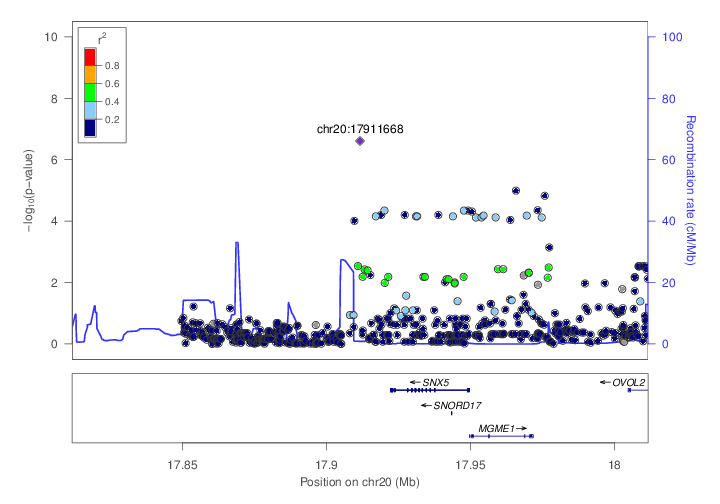

In [48]:
# Display PDF
fname = 'lz/test_180322_chr%s_%s-%s/chr%s_%s-%s.pdf'%(CHROM,START-WINDOW,START+WINDOW,CHROM,START-WINDOW,START+WINDOW)
img = WImage(filename=fname)
print(fname)
img